In [ ]:
#import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
train = pd.read_csv('../datasets/train_cleaned.csv')

In [5]:
train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,1,74.0,13517,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,1,TA,CBlock,2,2,2,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,1,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,4,4,Y,0,44,0,0,0,0,1,Na,Na,0,3,2010,WD,130500
1,60,1,43.0,11492,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,1,TA,PConc,3,2,2,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,1,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,4,4,Y,0,74,0,0,0,0,1,Na,Na,0,4,2009,WD,220000
2,20,1,68.0,7922,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,2,Gd,CBlock,2,2,2,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,2,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,4,4,Y,0,52,0,0,0,0,1,Na,Na,0,1,2010,WD,109000
3,60,1,73.0,9802,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,2,TA,PConc,3,2,2,Unf,0.0,Unf,0.0,384.0,384.0,GasA,3,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,4,4,Y,100,0,0,0,0,0,1,Na,Na,0,4,2010,WD,174000
4,50,1,82.0,14235,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,2,TA,PConc,4,3,2,Unf,0.0,Unf,0.0,676.0,676.0,GasA,2,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,4,4,N,0,59,0,0,0,0,1,Na,Na,0,3,2010,WD,138500


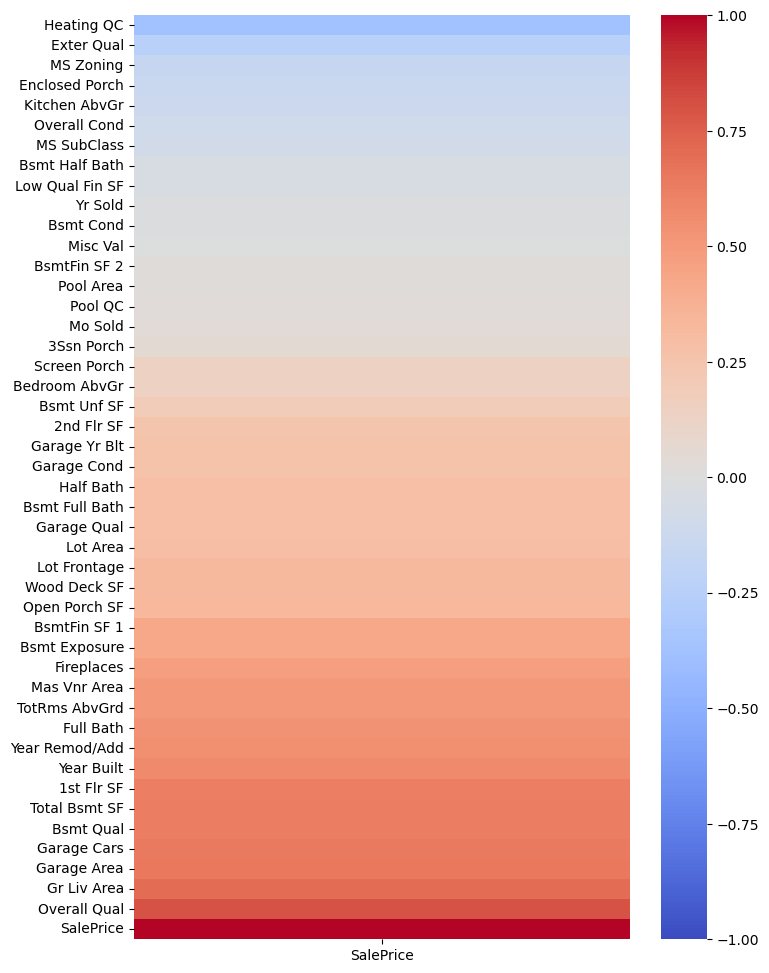

In [6]:
plt.figure(figsize=(8, 12))
sns.heatmap(train.corr(numeric_only = True)[['SalePrice']].sort_values('SalePrice'),
            cmap='coolwarm',
            vmin=-1,
            vmax=1);

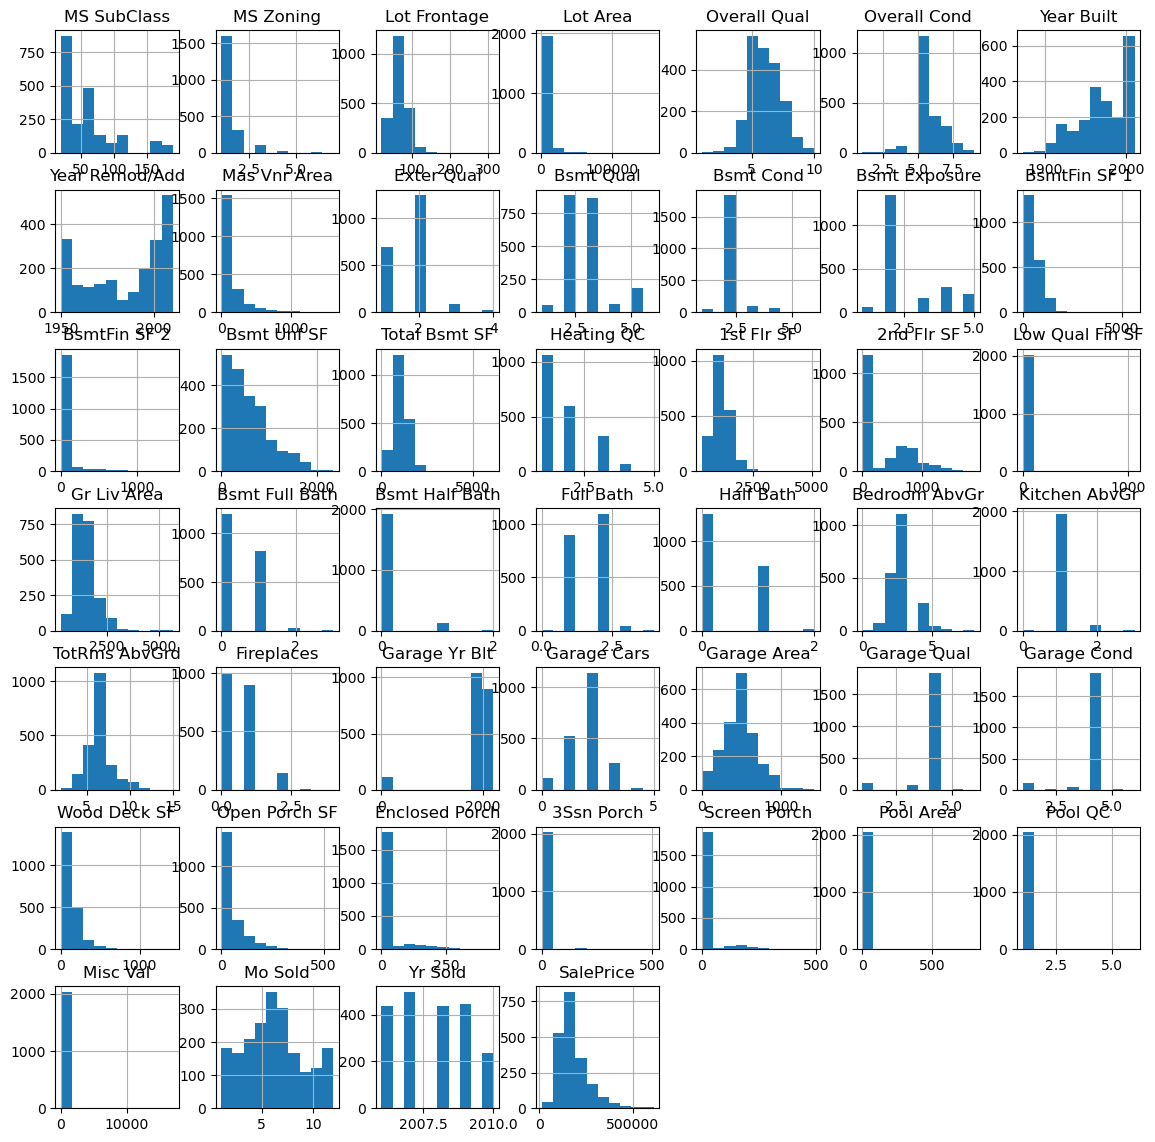

In [7]:
train.hist(figsize=(14,14));

In [8]:
train['Neighborhood'].value_counts()

Neighborhood
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [9]:
train['Total_Sqft']= train['Total Bsmt SF']+train['Wood Deck SF']+train['Open Porch SF']+train['1st Flr SF']+train['2nd Flr SF']

In [10]:
train.dtypes

MS SubClass          int64
MS Zoning            int64
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual           int64
Exter Cond          object
Foundation          object
Bsmt Qual            int64
Bsmt Cond            int64
Bsmt Exposure        int64
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
T

In [11]:
train.SalePrice.describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

#### The average sale price of a house in our dataset is close to $181469.701609

In [12]:
train.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

/Users/rajashreechoudhary/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


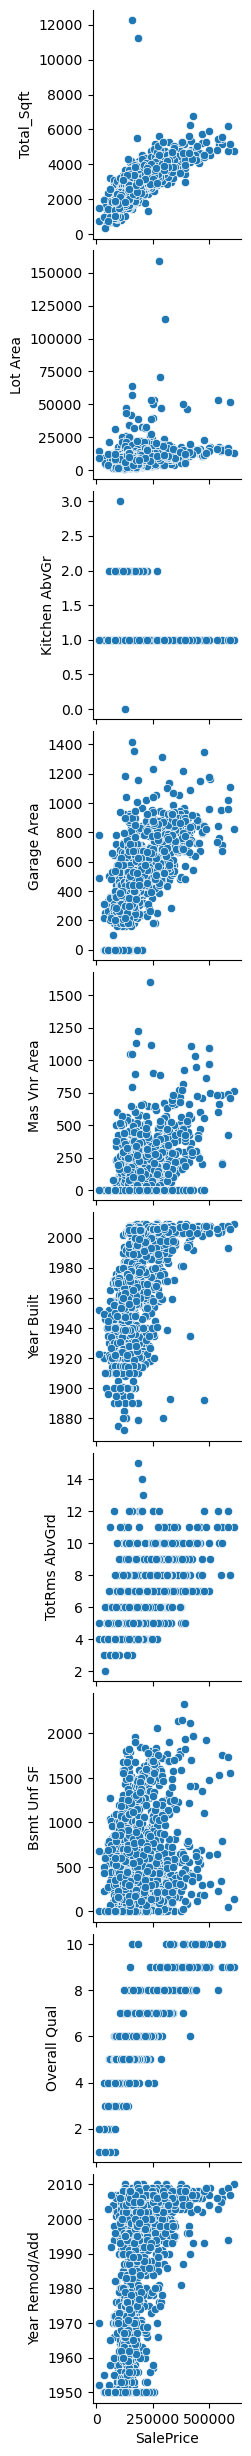

In [13]:
sns.pairplot(train, x_vars=['SalePrice'], y_vars=['Total_Sqft','Lot Area', 'Kitchen AbvGr', 'Garage Area',
                                                'Mas Vnr Area','Year Built','TotRms AbvGrd','Bsmt Unf SF',
                                                'Overall Qual','Year Remod/Add'])

<Axes: >

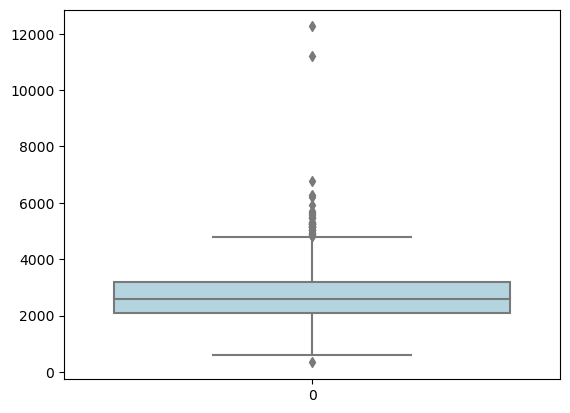

In [14]:
sns.boxplot(train['Total_Sqft'],color='lightblue')

<Axes: >

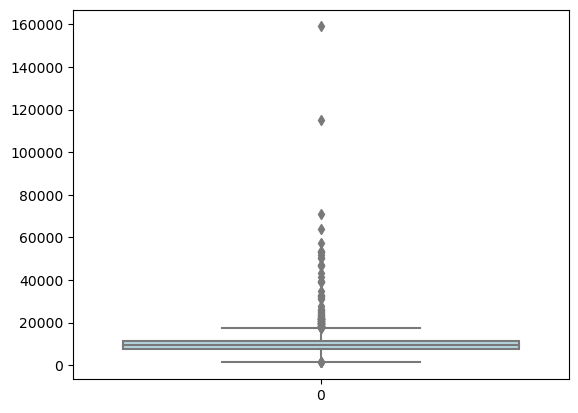

In [15]:
sns.boxplot(train['Lot Area'],color='lightblue')

<Axes: >

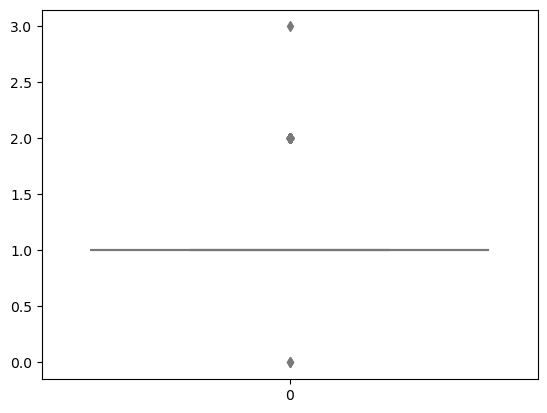

In [16]:
sns.boxplot(train['Kitchen AbvGr'],color='lightblue')

In [17]:
# 'Total_Sqft','Lot Area', 'Kitchen AbvGr', 'Garage Area',
# 'Mas Vnr Area','Year Built','TotRms AbvGrd','Bsmt Unf SF',
# 'Overall Qual','Year Remod/Add'

<Axes: >

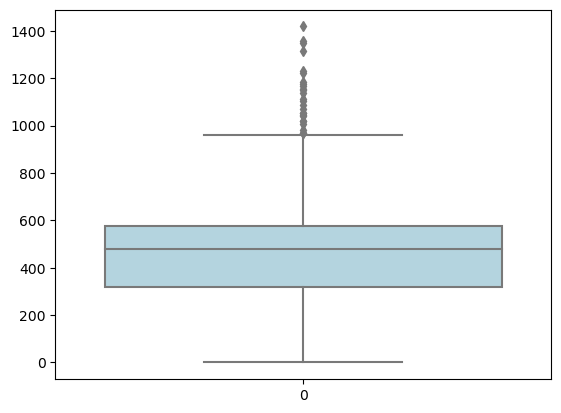

In [18]:
sns.boxplot(train['Garage Area'],color='lightblue')

<Axes: >

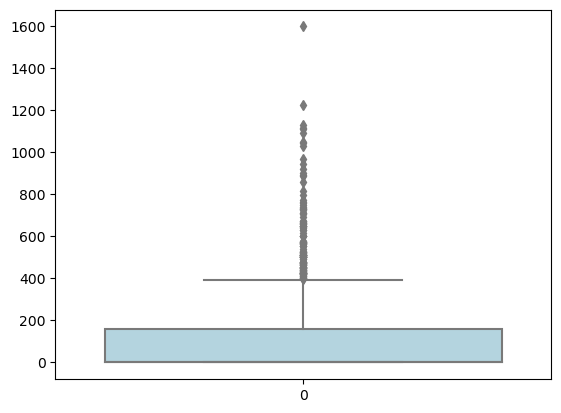

In [19]:
sns.boxplot(train['Mas Vnr Area'],color='lightblue')

<Axes: >

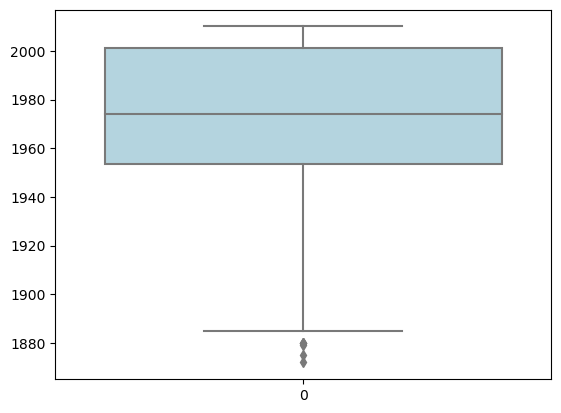

In [20]:
sns.boxplot(train['Year Built'],color='lightblue')

<Axes: >

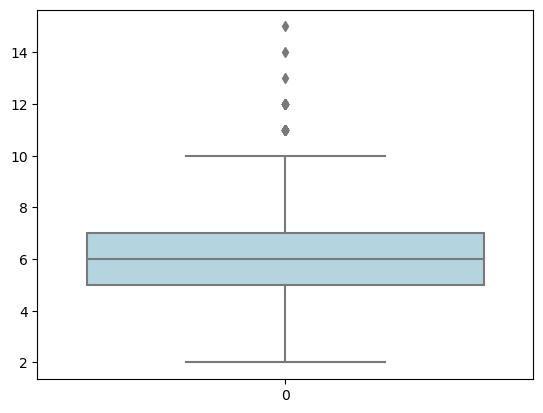

In [21]:
sns.boxplot(train['TotRms AbvGrd'],color='lightblue')

<Axes: >

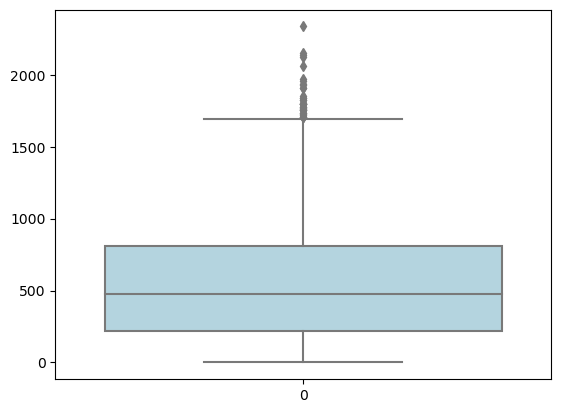

In [22]:
sns.boxplot(train['Bsmt Unf SF'],color='lightblue')

<Axes: >

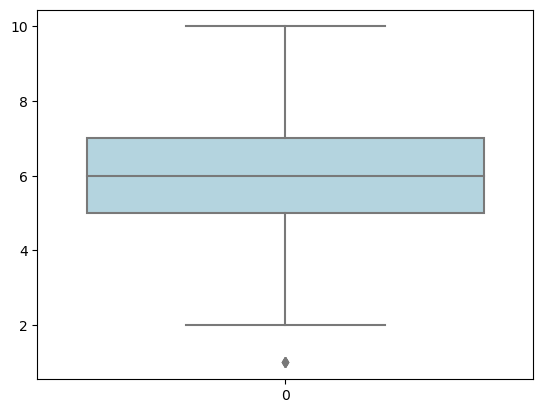

In [23]:
sns.boxplot(train['Overall Qual'],color='lightblue')

<Axes: >

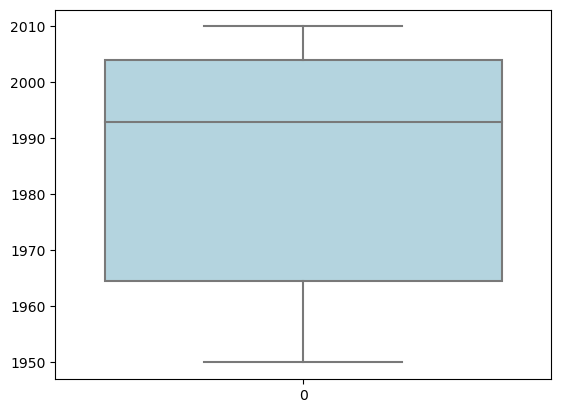

In [24]:
sns.boxplot(train['Year Remod/Add'],color='lightblue')

In [26]:
train.to_csv("../datasets/eda_feature_engineered.csv",index=False)